In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [16]:
# Load your dataset (please replace 'your_data.csv' with your actual file path)
data = pd.read_csv('Fraud.csv')

In [17]:
# 3. Clean Your Data

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill missing values or drop if necessary (assume filling zeros for balance fields)
data['oldbalanceDest'].fillna(0, inplace=True)
data['newbalanceDest'].fillna(0, inplace=True)

# Create boolean columns based on the 'type' column
data_cleaned = data.copy()
data_cleaned['type_CASH_OUT'] = (data_cleaned['type'] == 'CASH_OUT')
data_cleaned['type_DEBIT'] = (data_cleaned['type'] == 'DEBIT')
data_cleaned['type_PAYMENT'] = (data_cleaned['type'] == 'PAYMENT')
data_cleaned['type_TRANSFER'] = (data_cleaned['type'] == 'TRANSFER')

# Convert boolean columns to integers for modeling
data_cleaned['type_CASH_OUT'] = data_cleaned['type_CASH_OUT'].astype(int)
data_cleaned['type_DEBIT'] = data_cleaned['type_DEBIT'].astype(int)
data_cleaned['type_PAYMENT'] = data_cleaned['type_PAYMENT'].astype(int)
data_cleaned['type_TRANSFER'] = data_cleaned['type_TRANSFER'].astype(int)

# Drop the 'type' column now that we have created the necessary boolean columns
data_cleaned.drop(['type', 'nameOrig', 'nameDest'], axis=1, inplace=True)

# Check the cleaned data
data_cleaned.head()


Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [18]:
# Add balance_change feature
data_cleaned['balance_change'] = data_cleaned['newbalanceOrig'] - data_cleaned['oldbalanceOrg']

In [19]:
data_cleaned.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_change
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0,-9839.64
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0,-1864.28
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1,-181.00
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0,-181.00
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0,-11668.14


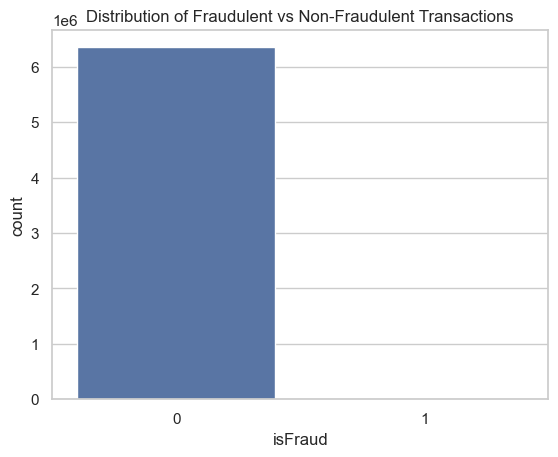

In [20]:
# 4. Explore Your Data
# Visualize class distribution
sns.countplot(x='isFraud', data=data_cleaned)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

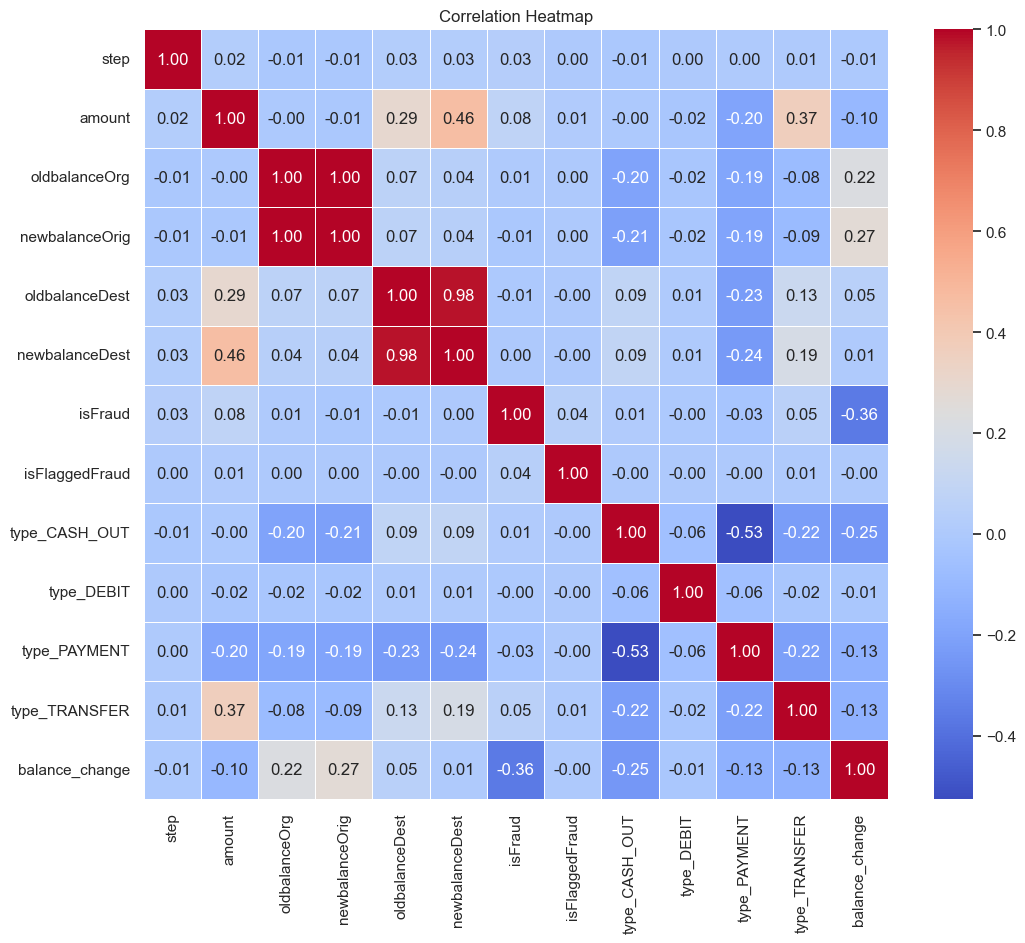

In [21]:
# 4.1 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# 5. Split Your Data
X = data_cleaned.drop('isFraud', axis=1)
y = data_cleaned['isFraud']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
# 6. Choose a Model
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
}

In [26]:
# 7. Train Your Model
results = {}

In [27]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'roc_auc_score': roc_auc_score(y_test, y_pred)
    }
    
    print(f"Results for {model_name}:\n")
    print(results[model_name]['classification_report'])
    print("Confusion Matrix:\n", results[model_name]['confusion_matrix'])
    print("ROC AUC Score:", results[model_name]['roc_auc_score'])
    print("\n" + "="*50 + "\n")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.90      0.48      0.62      2464

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.81   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906185     137]
 [   1287    1177]]
ROC AUC Score: 0.7388033526452659


Results for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.98      0.78      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906281      41]
 [    533    1931]]
ROC AUC Score: 0.8918317787753441




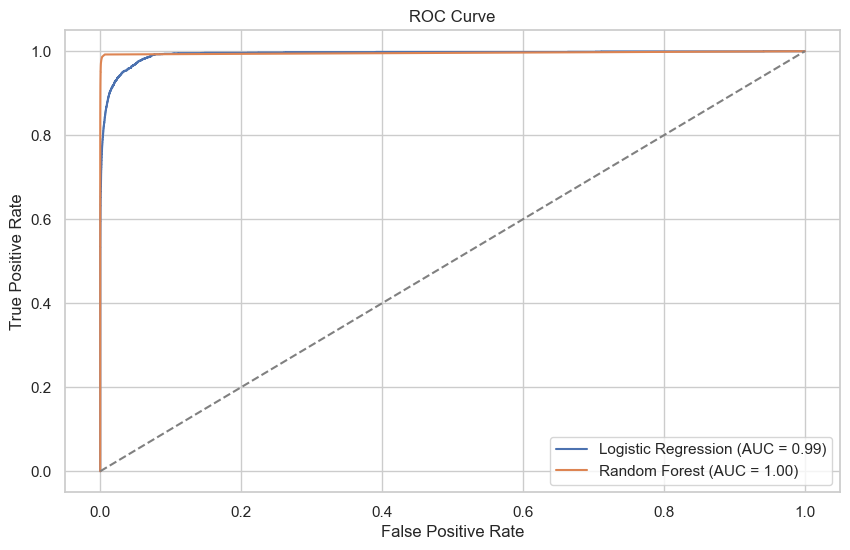

In [30]:
# 8. Evaluate Your Model
from sklearn.metrics import roc_curve, roc_auc_score
# Plot ROC Curve
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [32]:
# 9. Improve Your Model
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_scaled)

# Evaluate best model
print("Best Random Forest Model Results:\n")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_best))